## Table of Contents

1. Business Background and Project Overview
2. Dataset and Exploration
3. Quantifying the Business Problem Size
4. Key Insights
5. Summary of Key Insights and Recommendations
6. Resources and References

## Business Background and Project Overview

The Board of the human capital department of a large corporation I work for is worried about the relatively high <br>turnover of employees. As an analyst on the team assigned to this task, I am to provide a report to help the board better understand the situation:
- which employees are more likely to leave
- which department has the highest employee turnover and which one has the lowest
- which variables seem to be indicators of employee departure

## Dataset and Exploration

The department assembled data on almost 10,000 employees across 10 variables derived from information from exit interviews, <br> performance reviews, and employee records. The variables are defined as follows:

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

The data had no missing values.

#### import modules

In [ ]:
# install packages if necessary
!pip install pywaffle -q --upgrade

import pandas as pd
import numpy as np

import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dc-workspace 1.0.0 requires jupytext, which is not installed.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.22.2 which is incompatible.
tensorflow 2.4.1 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja2 3.0.1 which is incompatible.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In order to strategically carry out the analysis, I grouped the variables into categories to answer 3 main questions:
- Who are the employees leaving?
- When are they leaving?
- Why are they leaving?

In [ ]:
df_var = pd.DataFrame({'Who are those leaving?' : ['department', np.nan, np.nan, np.nan, np.nan, np.nan], 
                      'When are they leaving?' : ['tenure', 'projects', np.nan, np.nan, np.nan, np.nan],
                       'Why are they leaving?' : ['satisfaction score', 'review score', 'average hours (month)', 'bonus', 'promotion', 'salary']})
df_var = df_var.fillna(' ').style.set_properties(**{'text-align': 'left'});df_var

,Who are those leaving?,When are they leaving?,Why are they leaving?
0,department,tenure,satisfaction score
1,,projects,review score
2,,,average hours (month)
3,,,bonus
4,,,promotion
5,,,salary


## Quantifying the Business Problem Size

### <font color='darkgreen'>How severe is the employee attrition?</font>

In [ ]:
df = pd.read_csv('./data/employee_churn_data.csv')

In [ ]:
df['left'].value_counts(dropna=False, normalize=True)

no     0.708176
yes    0.291824
Name: left, dtype: float64

From the data analyzed, 30% of the employees have left.

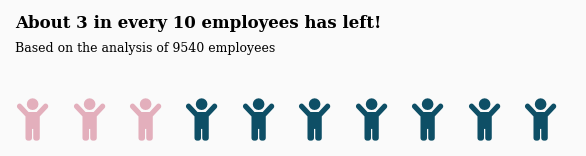

In [ ]:
data = {'Left': 3, 'Employed':7}
background_color = "#fafafa" 
fig = plt.figure(figsize=(4, 2),dpi=150,facecolor=background_color,
    FigureClass=Waffle,
    rows=1,
    values=data,
    colors=["#e3afbc", '#0e4f66'],
    legend={'loc': 2, 'bbox_to_anchor': (1, 1)},
    icons='child',
    font_size=20,
    vertical=True
)

fig.text(0.035,0.78,'About 3 in every 10 employees has left!' ,fontfamily='serif',fontsize=8,fontweight='bold')
fig.text(0.035,0.70,'Based on the analysis of 9540 employees',fontfamily='serif',fontsize=6)
fig.gca().get_legend().remove()

fig.tight_layout()
plt.savefig('img/headline.png')
plt.show()

Given that employees are the best judges of their working conditions and job satisfaction, I analyzed satisfaction scores to understand the trends for both groups of employees. 

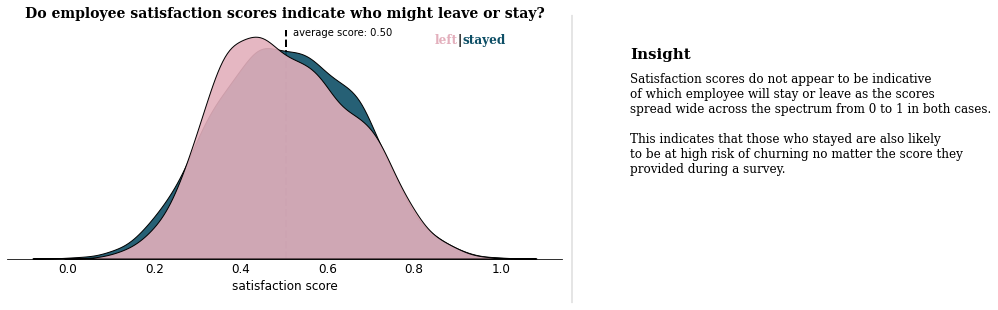

In [ ]:
avg_sc = df['satisfaction'].mean()

fig, ax = plt.subplots(1,1, figsize=(8, 4))

ax.tick_params(axis='y', left=False)
ax.get_yaxis().set_visible(False)
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

y = df[df['left'] == 'yes']
n = df[df['left'] == 'no']


sns.kdeplot(n['satisfaction'],ax=ax, color='#0e4f66', shade=True, linewidth=1, ec='black',alpha=0.9, zorder=3, legend=False)
sns.kdeplot(y['satisfaction'], ax=ax, color='#e3afbc', shade=True, linewidth=1, ec='black',alpha=0.9, zorder=3, legend=False)

ax.set_xlabel('satisfaction score', fontsize=12)
# ax.margins(x=0, y=0) 
ax.axvline(avg_sc, ymax=0.98, color='k', linestyle='dashed', linewidth=2)
ax.annotate("average score: {:.2f}".format(avg_sc), xy=(0.30, 1), xytext=(0.52, 2.35))

fig.text(0.05, 0.99, 'Do employee satisfaction scores indicate who might leave or stay?', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(0.76,0.9,'left', fontweight="bold", fontfamily='serif', fontsize=12, color='#e3afbc')
fig.text(0.80,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.text(0.81,0.9,"stayed", fontweight="bold", fontfamily='serif', fontsize=12, color='#0e4f66')

fig.text(0.13,0.93,'',fontfamily='serif',fontsize=14,fontweight='bold')

fig.text(1.1,0.85, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.35, '''
Satisfaction scores do not appear to be indicative 
of which employee will stay or leave as the scores
spread wide across the spectrum from 0 to 1 in both cases.

This indicates that those who stayed are also likely 
to be at high risk of churning no matter the score they 
provided during a survey.

''' , 
         fontsize=12, fontweight='light', fontfamily='serif')


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

fig.tight_layout()
plt.savefig('img/sat score indicative.png', bbox_inches='tight')
plt.show()

Since employees left whether or not they gave a high satisfaction score, I would like to find out characteristics of employees who are at the highest risk of leaving.<br> In order to do this, I grouped all the employees into segments on the basis of their satisfaction score.

Given that the average satisfaction score across all the employees is 0.505, I grouped the customers into 3 segments - detractors, passives and promoters.

In [ ]:
# variable for counting
df['count'] = 1

# grouping customers according to their satisfaction score
bins = [0, 0.4999,  0.6999, 1.1]
labels = ['0.0_0.499', '0.5_0.699', '0.7+']
df['satisfaction.group2'] = pd.cut(df['satisfaction'], bins, labels=labels, include_lowest=True)

# assigning descriptive names to segments based on satisfaction score
df['satisfaction.group3'] = np.where(df['satisfaction.group2'] == '0.0_0.499', 'detractors', 
                                     np.where(df['satisfaction.group2'] == '0.5_0.699', 'passives', 
                                              np.where(df['satisfaction.group2'] == '0.7+', 'promoters',
                                                       'unknown')))

df['satisfaction.group3'].value_counts(dropna=False, normalize=True)

df_seg = pd.DataFrame({'Satisfaction Score Range' : ['0.0_0.499', '0.5_0.699', '0.7+'], 
                      'Employee Segment' : ['detractors', 'passives', 'promoters'],
                       'Percentage' : ['49.8%', '38.1%', '12.1%']})
df_seg = df_seg.style.set_properties(**{'text-align': 'center'}); df_seg

,Satisfaction Score Range,Employee Segment,Percentage
0,0.0_0.499,detractors,49.8%
1,0.5_0.699,passives,38.1%
2,0.7+,promoters,12.1%


The following observations were made:
- 50% of all the employees are **detractors** - their satisfaction score is below 0.5.<br> 
- About 40% of the employees are **passives** - their satisfaction score is between 0.5 and 0.6999<br> 
- 12% are **promoters** - their satisfaction score is 0.7 and higher.

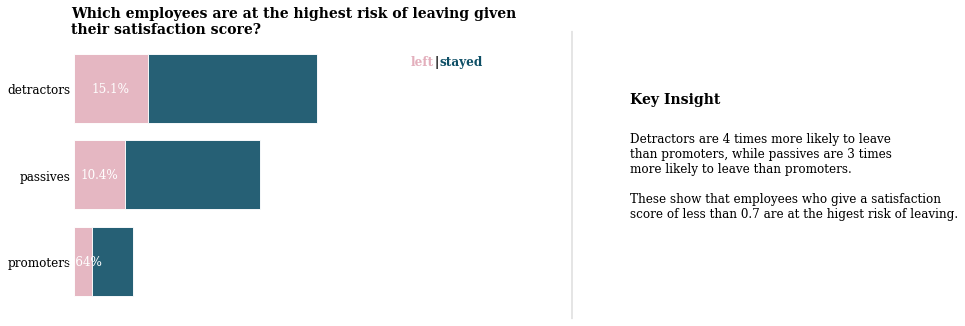

In [ ]:
df_seg2 = (df[['satisfaction.group3', 'left', 'count']].groupby(['satisfaction.group3'])['left'].value_counts().unstack()).div(df['count'].sum())[['yes', 'no']].sort_values(by='yes', ascending=False)

fig, ax = plt.subplots(1,1,figsize=(8, 4)) 

ax.barh(df_seg2.index, df_seg2['yes'], ec='white',
        color='#e3afbc', alpha=0.9, label='left')
ax.barh(df_seg2.index, df_seg2['no'], left=df_seg2['yes'],ec='white',
        color='#0e4f66', alpha=0.9, label='stayed')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(df_seg2.index, fontfamily='serif', fontsize=11)

ax.invert_yaxis()

for i in df_seg2.index:
    ax.annotate(f"{df_seg2['yes'][i]*100:.3}%", 
                   xy=(df_seg2['yes'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

fig.text(0.72,0.88,'left', fontweight="bold", fontfamily='serif', fontsize=12, color='#e3afbc')
fig.text(0.76,0.88,'|', fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.text(0.77,0.88,'stayed', fontweight="bold", fontfamily='serif', fontsize=12, color='#0e4f66')

fig.text(0.13, 0.99, 'Which employees are at the highest risk of leaving given \ntheir satisfaction score?', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.75, 'Key Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.25, '''
Detractors are 4 times more likely to leave
than promoters, while passives are 3 times 
more likely to leave than promoters.

These show that employees who give a satisfaction 
score of less than 0.7 are at the higest risk of leaving.

''' , 
         fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

fig.tight_layout()
plt.savefig('img/high risk employees.png', bbox_inches='tight')
plt.show()

## Key Insights

The next thing to explore is the profile of the employees in the different segments and identifying their pain points. 

### <font color='darkgreen'>Who are the employees leaving?</font>

##### <font color='darkgreen'>_Department_</font>

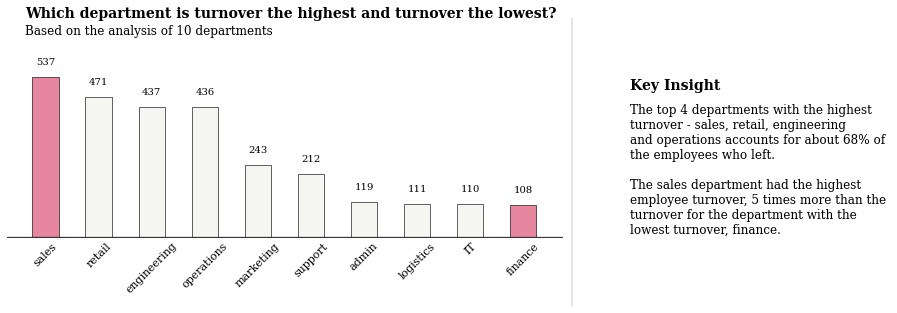

In [ ]:
data = df[df['left']=='yes'].groupby('department')['count'].sum().sort_values(ascending=False)

# Plot
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0]  = color_map[9] ='#e6879f' 


fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.bar(data.index, data, width=0.5,
       edgecolor='black',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 50), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title
fig.text(0.05, 1, 'Which department is turnover the highest and turnover the lowest?', fontsize=14, fontweight='bold', fontfamily='serif')
fig.text(0.05,0.94,'Based on the analysis of 10 departments',fontfamily='serif',fontsize=12)

fig.text(1.1, 0.75, 'Key Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.2, '''
The top 4 departments with the highest
turnover - sales, retail, engineering 
and operations accounts for about 68% of
the employees who left.

The sales department had the highest
employee turnover, 5 times more than the 
turnover for the department with the 
lowest turnover, finance.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 800, 100)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 45, fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(False), fontfamily='serif', rotation = 45, fontsize=11)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=11)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

fig.tight_layout()
plt.savefig('img/employees leaving.png', bbox_inches='tight')
plt.show()

The above insight indicates that employees in the sales, retail, engineering and operations department are at the highest risk of leaving.

### <font color='darkgreen'>When are the employees leaving?</font>

##### <font color='darkgreen'>_Number of Projects_</font>

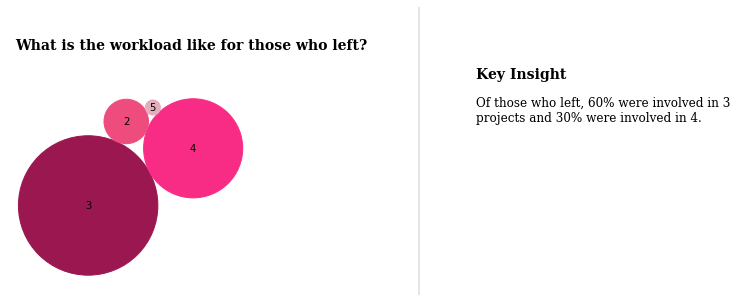

In [ ]:
data = df[df['left']=='yes'].groupby('projects')['count'].sum().sort_values(ascending=False)

bubble_chart_data = {
    'index': data.index,
    'data': data.values,
    'color': [ '#9a1750', '#F92C85','#ee4c7c','#e3afbc',]
    
}

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


    
           
bubble_chart = BubbleChart(area=bubble_chart_data['data'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax =plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(8, 4))
bubble_chart.plot(
    ax, bubble_chart_data['index'], bubble_chart_data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()

fig.text(0.3, 0.85, 'What is the workload like for those who left?', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.75, 'Key Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.55, '''
Of those who left, 60% were involved in 3 
projects and 30% were involved in 4.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 80, 10)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(),fontfamily='serif', rotation = 45, fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(False), fontfamily='serif', rotation = 45, fontsize=11)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

fig.tight_layout()
plt.savefig('img/workload bubble chart.png', bbox_inches='tight')
plt.show()

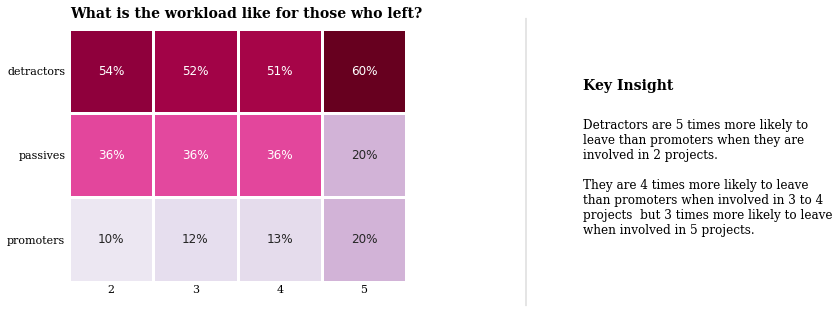

In [ ]:
df_heatmap = df[df['left'] == 'yes']
df_heatmap1 = pd.crosstab(df_heatmap['projects'],df_heatmap['satisfaction.group3'],normalize = "index").T

cmap = plt.cm.get_cmap('PuRd')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.heatmap(df_heatmap1,cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(False)


fig.text(0.21, 1, 'What is the workload like for those who left?', fontweight='bold', fontfamily='serif', fontsize=14)   

fig.text(1.1, 0.75, 'Key Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.2, '''
Detractors are 5 times more likely to 
leave than promoters when they are 
involved in 2 projects.

They are 4 times more likely to leave 
than promoters when involved in 3 to 4
projects  but 3 times more likely to leave
when involved in 5 projects.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.savefig('img/workload heatmap.png', bbox_inches='tight')
plt.show()

The above insights indicate that employees with fewer projects are at the highest risk of leaving.

##### <font color='darkgreen'>_Tenure_</font>

All the 9540 employees had a tenure that ranged from 2 to 12 years.

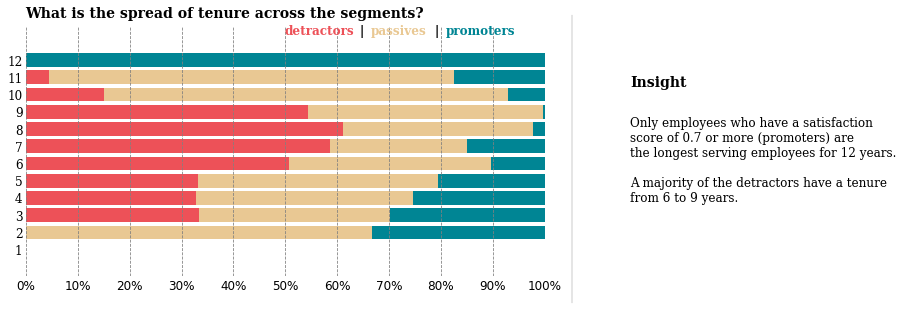

In [ ]:
# variables
cross_tab_prop = pd.crosstab(index=df['tenure'],
                             columns=df['satisfaction.group3'],
                             normalize="index").sort_index(ascending=True)
labels = ['detractors', 'passives', 'promoters']
colors = ['#ed5158','#e9c893','#008594']
title = 'Video Game Sales By Platform and Region\n'
subtitle = 'Proportion of Games Sold by Region'
# def plot_stackedbar_p(df, labels, colors, title, subtitle):

fields = cross_tab_prop.columns.tolist()
    

fig, ax = plt.subplots(1,1,figsize=(8, 4))

# plot bars
left = len(cross_tab_prop) * [0]
for idx, name in enumerate(fields):
    plt.barh(cross_tab_prop.index, cross_tab_prop[name], left = left, color=colors[idx])
    left = left + cross_tab_prop[name]

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(cross_tab_prop.index, fontfamily='serif', fontsize=11)
# # remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# format x ticks
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1])
yticks = np.arange(1,13,1)
ylabels = [i for i in np.arange(1,13,1)]
plt.yticks(yticks, ylabels)
ax.xaxis.grid(color='gray', linestyle='dashed')
    
fig.text(0.5,0.93,'detractors', fontweight="bold", fontfamily='serif', fontsize=12, color='#ed5158')
fig.text(0.63,0.93,'|', fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.text(0.65,0.93,'passives', fontweight="bold", fontfamily='serif', fontsize=12, color='#e9c893')
fig.text(0.76,0.93,'|', fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.text(0.78,0.93,'promoters', fontweight="bold", fontfamily='serif', fontsize=12, color='#008594')

fig.text(0.05, 0.99, 'What is the spread of tenure across the segments?', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.75, 'Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.3, '''
Only employees who have a satisfaction
score of 0.7 or more (promoters) are 
the longest serving employees for 12 years.

A majority of the detractors have a tenure
from 6 to 9 years.
''' , 
         fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.savefig('img/all employee tenure.png', bbox_inches='tight')
plt.show()

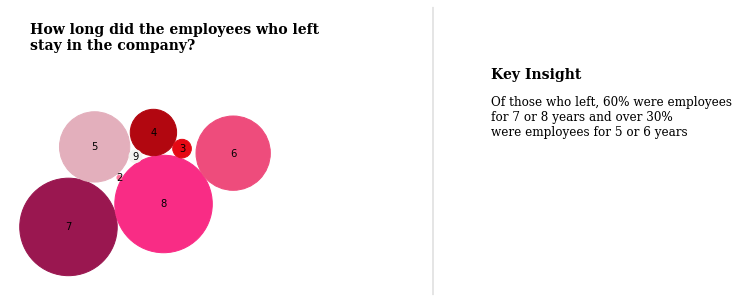

In [ ]:
df['tenure'] = df['tenure'].astype('int64')
data = df[df['left']=='yes'].groupby('tenure')['count'].sum().sort_values(ascending=False)

bubble_chart_data = {
    'index': data.index,
    'data': data.values,
    'color': ['#9a1750', '#F92C85','#ee4c7c','#e3afbc', '#b20710', '#e50914','#f5f5f1','#FE759C',]
}

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


    
           
bubble_chart = BubbleChart(area=bubble_chart_data['data'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(8, 4))
bubble_chart.plot(
    ax, bubble_chart_data['index'], bubble_chart_data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()

fig.text(0.3, 0.85, 'How long did the employees who left\nstay in the company?', fontsize=14, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.75, 'Key Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.5, '''
Of those who left, 60% were employees 
for 7 or 8 years and over 30% 
were employees for 5 or 6 years
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 80, 10)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(),fontfamily='serif', rotation = 45, fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(False), fontfamily='serif', rotation = 45, fontsize=11)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

fig.tight_layout()
plt.savefig('img/tenure bubble chart.png', bbox_inches='tight')
plt.show()

The insight above indicates that the longer the tenure, the higher the risk of an employee leaving.

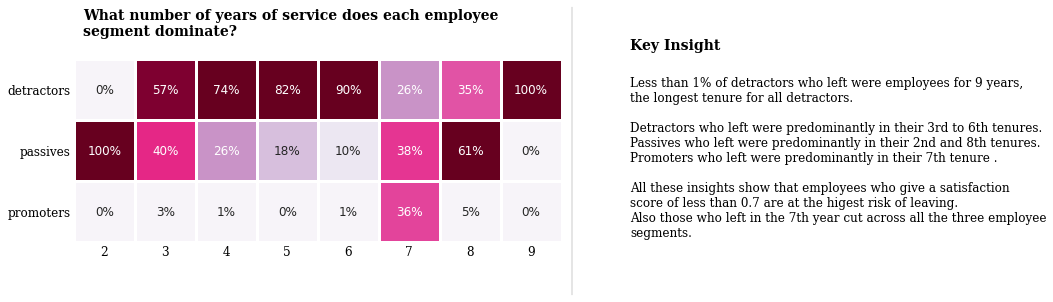

In [ ]:
df['tenure'] = df['tenure'].astype('int64')
color_map = plt.cm.get_cmap('PuRd')
df_tenure = df[df['left'] == 'yes']
df_heatmap0 = pd.crosstab(df_tenure['tenure'],df_tenure['satisfaction.group3'],normalize = "index").T

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.heatmap(df_heatmap0,cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(False)


fig.text(0.15, 0.9, 'What number of years of service does each employee \nsegment dominate?', fontweight='bold', fontfamily='serif', fontsize=14)   

fig.text(1.1, 0.85, 'Key Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.15, '''
Less than 1% of detractors who left were employees for 9 years,
the longest tenure for all detractors.

Detractors who left were predominantly in their 3rd to 6th tenures. 
Passives who left were predominantly in their 2nd and 8th tenures.
Promoters who left were predominantly in their 7th tenure .

All these insights show that employees who give a satisfaction 
score of less than 0.7 are at the higest risk of leaving. 
Also those who left in the 7th year cut across all the three employee
segments.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.savefig('img/years of service heatmap.png', bbox_inches='tight')
plt.show()

### <font color='darkgreen'>Why are the employees leaving?</font>

##### <font color='darkgreen'>_Review Scores_</font>

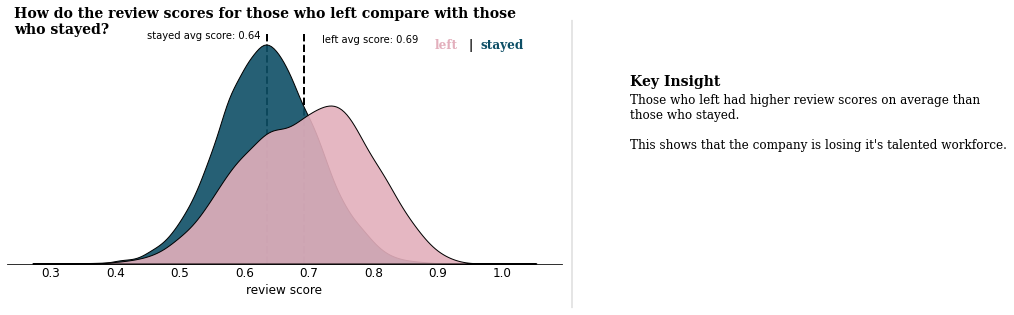

In [ ]:
avg_rs_y = df[df['left'] == 'yes']['review'].mean()
avg_rs_n = df[df['left'] == 'no']['review'].mean()

fig, ax = plt.subplots(1,1, figsize=(8, 4))

ax.tick_params(axis='y', left=False)
ax.get_yaxis().set_visible(False)
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

y = df[df['left'] == 'yes']
n = df[df['left'] == 'no']


sns.kdeplot(n['review'], ax=ax, color='#0e4f66', shade=True, linewidth=1, ec='black',alpha=0.9, zorder=3, legend=False)
sns.kdeplot(y['review'],ax=ax, color='#e3afbc', shade=True, linewidth=1, ec='black',alpha=0.9, zorder=3, legend=False)

ax.set_xlabel('review score', fontsize=12)

ax.axvline(avg_rs_n, color='k', linestyle='dashed', linewidth=2)
ax.axvline(avg_rs_y, color='k', linestyle='dashed', linewidth=2)
ax.annotate("left avg score: {:.2f}".format(avg_rs_y), xy=(0.35, 1), xytext=(0.72, 5.4))
ax.annotate("stayed avg score: {:.2f}".format(avg_rs_n), xy=(0.35, 1), xytext=(0.45, 5.5))

fig.text(0.03, 0.95, 'How do the review scores for those who left compare with those \nwho stayed?', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(0.76,0.90,'left', fontweight="bold", fontfamily='serif', fontsize=12, color='#e3afbc')
fig.text(0.82,0.90,"|", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.text(0.84,0.90,"stayed", fontweight="bold", fontfamily='serif', fontsize=12, color='#0e4f66')

fig.text(0.13,0.93,'',fontfamily='serif',fontsize=14,fontweight='bold')

fig.text(1.1,0.77, 'Key Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.50, '''
Those who left had higher review scores on average than
those who stayed. 

This shows that the company is losing it's talented workforce.
''' , fontsize=12, fontweight='light', fontfamily='serif')


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

fig.tight_layout()
plt.savefig('img/review score indicative.png', bbox_inches='tight')
plt.show()

To get further insights into the type of employees leaving based on their performance evaluation, <br>
I grouped the employees into 3 segments based on their review score - subpar performers, solid performers and high performers.

In [ ]:
# grouping customers according to their review score
bins = [0,  0.5999, 0.6999,  1.1]
labels = ['0.0_0.599', '0.6_0.699', '0.7+']
df['review.group2'] = pd.cut(df['review'], bins, labels=labels, include_lowest=True)

# assigning descriptive names to segments based on review score
df['review.group3'] = np.where(df['review.group2'] == '0.0_0.599', 'subpar performers', 
                                     np.where(df['review.group2'] == '0.6_0.699', 'solid performers', 
                                              np.where(df['review.group2'] == '0.7+', 'high performers',
                                                       'unknown')))

df_rev = pd.DataFrame({'Review Score Range' : ['0.0_0.599', '0.6_0.699', '0.7+'], 
                      'Employee Segment' : ['subpar performers', 'solid performers', 'high performers '],
                       'Percentage' : ['27.9%', '43.9%',  '28.2%']})
df_rev = df_rev.style.set_properties(**{'text-align': 'center'}); df_rev

,Review Score Range,Employee Segment,Percentage
0,0.0_0.599,subpar performers,27.9%
1,0.6_0.699,solid performers,43.9%
2,0.7+,high performers,28.2%


The following observations were made:
- 30% of all the employees are **subpar performers** - their review score is below 0.6.<br> 
- About 44% of the employees are **solid performers** - their review score is between 0.6 and 0.699<br> 
- 28% are **high performers** - their review score is 0.7 and higher.

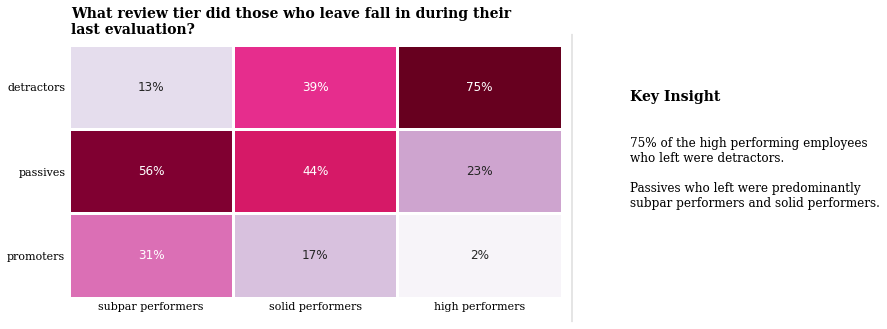

In [ ]:
df_review = df[df['left'] == 'yes']
df_heatmap3 = pd.crosstab(df_review['review.group3'],df_review['satisfaction.group3'],normalize = "index").T
df_heatmap3 = df_heatmap3[['subpar performers','solid performers', 'high performers']]; df_heatmap3

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.heatmap(df_heatmap3,cmap=cmap,square=False, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(False)


fig.text(0.13, 1, 'What review tier did those who leave fall in during their \nlast evaluation?', fontweight='bold', fontfamily='serif', fontsize=14)

fig.text(1.1,0.77, 'Key Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.35, '''
75% of the high performing employees 
who left were detractors.

Passives who left were predominantly 
subpar performers and solid performers.
''' , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.savefig('img/review tier heatmap.png', bbox_inches='tight')
plt.show()

##### <font color='darkgreen'>_Average Monthly Hours Worked_</font> 

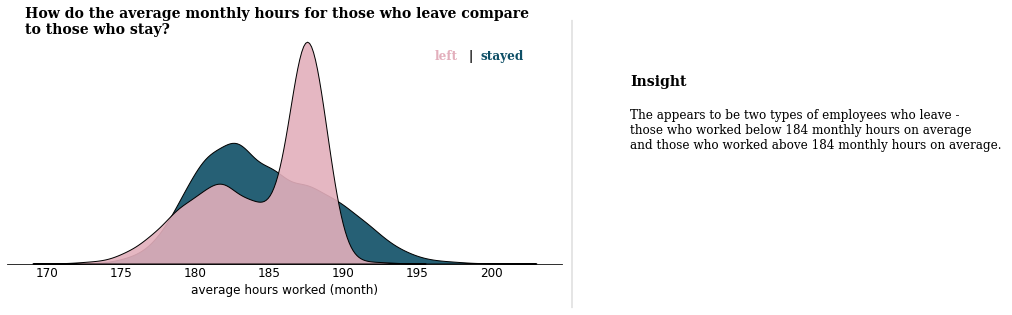

In [ ]:
avg_hm_y = df[df['left'] == 'yes']['avg_hrs_month'].mean()
avg_hm_n = df[df['left'] == 'no']['avg_hrs_month'].mean()

fig, ax = plt.subplots(1,1, figsize=(8, 4))

ax.tick_params(axis='y', left=False)
ax.get_yaxis().set_visible(False)
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

y = df[df['left'] == 'yes']
n = df[df['left'] == 'no']

sns.kdeplot(n['avg_hrs_month'],ax=ax, color='#0e4f66', shade=True, linewidth=1, ec='black',alpha=0.9, zorder=3, legend=False)
sns.kdeplot(y['avg_hrs_month'], ax=ax, color='#e3afbc', shade=True, linewidth=1, ec='black',alpha=0.9, zorder=3, legend=False)

ax.set_xlabel('average hours worked (month)', fontsize=12)

fig.text(0.05, 0.95, 'How do the average monthly hours for those who leave compare \nto those who stay?', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(0.76,0.86,'left', fontweight="bold", fontfamily='serif', fontsize=12, color='#e3afbc')
fig.text(0.82,0.86,"|", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.text(0.84,0.86,"stayed", fontweight="bold", fontfamily='serif', fontsize=12, color='#0e4f66')

fig.text(0.13,0.93,'',fontfamily='serif',fontsize=14,fontweight='bold')

fig.text(1.1,0.77, 'Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.5, '''
The appears to be two types of employees who leave -
those who worked below 184 monthly hours on average 
and those who worked above 184 monthly hours on average. 
''' , fontsize=12, fontweight='light', fontfamily='serif')


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.savefig('img/hours worked density plot.png', bbox_inches='tight')
plt.show()

In [ ]:
# grouping customers according to their satisfaction score
bins = [0,  184, 220]
labels = ['0_184.99', '185+']
df['avg_hrs_month.group2'] = pd.cut(df['avg_hrs_month'], bins, labels=labels, include_lowest=True)

# assigning descriptive names to segments based on satisfaction score
df['avg_hrs_month.group3'] = np.where(df['avg_hrs_month.group2'] == '0_184.99', 'short-hour workers', 
                                     np.where(df['avg_hrs_month.group2'] == '185+', 'long-hour workers', 
                                                       'unknown'))

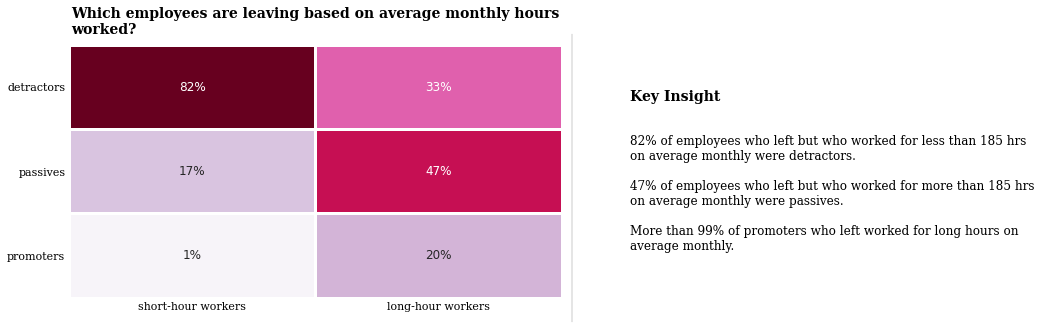

In [ ]:
df_avg_hrs = df[df['left'] == 'yes']
df_heatmap4 = pd.crosstab(df_avg_hrs['avg_hrs_month.group3'],df_avg_hrs['satisfaction.group3'],normalize = "index").T
df_heatmap4 = df_heatmap4.sort_values(by='avg_hrs_month.group3', axis=1, ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.heatmap(df_heatmap4,cmap=cmap,square=False, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(False)


fig.text(0.13, 1, 'Which employees are leaving based on average monthly hours \nworked?', fontweight='bold', fontfamily='serif', fontsize=14)   

fig.text(1.1,0.77, 'Key Insight', fontsize=14, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.20, '''
82% of employees who left but who worked for less than 185 hrs
on average monthly were detractors.

47% of employees who left but who worked for more than 185 hrs 
on average monthly were passives.

More than 99% of promoters who left worked for long hours on 
average monthly.
''' , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.savefig('img/hours worked by satisfaction segment.png', bbox_inches='tight')
plt.show()

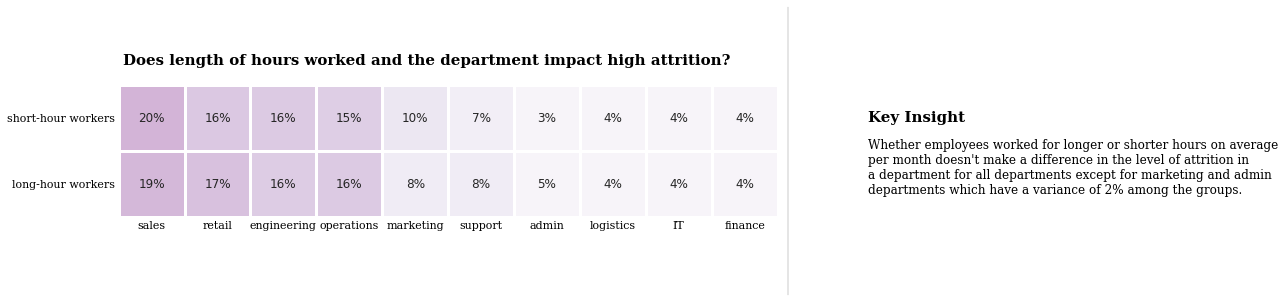

In [ ]:
department_order = ['sales', 'retail', 'engineering', 'operations', 'marketing', 'support', 'admin', 'logistics', 'IT', 'finance']
df_heatmap7 = pd.crosstab(df_avg_hrs['avg_hrs_month.group3'],df_avg_hrs['department'],normalize = "index")[department_order].sort_index(ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(11, 4))

sns.heatmap(df_heatmap7,cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(False)


fig.text(0.16, 0.8, 'Does length of hours worked and the department impact high attrition?', fontweight='bold', fontfamily='serif', fontsize=15)   

fig.text(1.1,0.6, 'Key Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.3, '''
Whether employees worked for longer or shorter hours on average
per month doesn't make a difference in the level of attrition in 
a department for all departments except for marketing and admin 
departments which have a variance of 2% among the groups. 
''' , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.savefig('img/department and hours.png', bbox_inches='tight')
plt.show()

##### <font color='darkgreen'>_Salary_</font> 

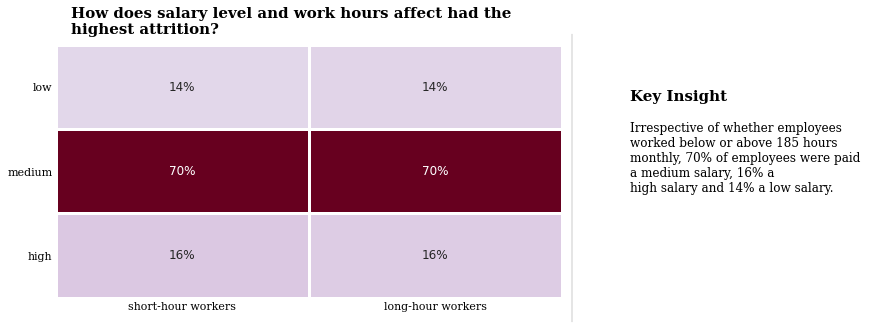

In [ ]:
df_heatmap5 = pd.crosstab(df_avg_hrs['avg_hrs_month.group3'],df_avg_hrs['salary'],normalize = "index")[['low', 'medium', 'high']].sort_index(ascending=False).T
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.heatmap(df_heatmap5,cmap=cmap,square=False, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(False)


fig.text(0.13, 1, 'How does salary level and work hours affect had the \nhighest attrition?', fontweight='bold', fontfamily='serif', fontsize=15)   

fig.text(1.1,0.77, 'Key Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.40, '''
Irrespective of whether employees  
worked below or above 185 hours 
monthly, 70% of employees were paid  
a medium salary, 16% a 
high salary and 14% a low salary.
''' , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.savefig('img/segment and salary levels.png', bbox_inches='tight')
plt.show()

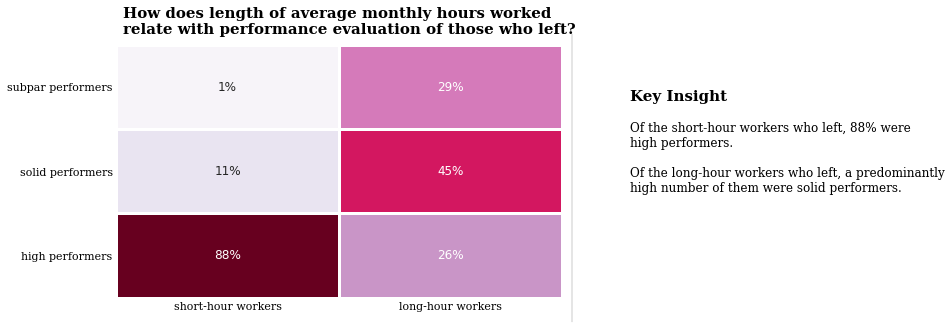

In [ ]:
df_heatmap6 = pd.crosstab(df_avg_hrs['avg_hrs_month.group3'],df_avg_hrs['review.group3'],normalize = "index")[['subpar performers', 'solid performers', 'high performers']].sort_index(ascending=False).T
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.heatmap(df_heatmap6,cmap=cmap,square=False, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(False)


fig.text(0.22, 1, 'How does length of average monthly hours worked \nrelate with performance evaluation of those who left?', fontweight='bold', fontfamily='serif', fontsize=15)   

fig.text(1.1,0.77, 'Key Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.40, '''
Of the short-hour workers who left, 88% were 
high performers. 

Of the long-hour workers who left, a predominantly
high number of them were solid performers.
''' , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.savefig('img/review tier and hours.png', bbox_inches='tight')
plt.show()

##### <font color='darkgreen'>_Bonus_</font> 

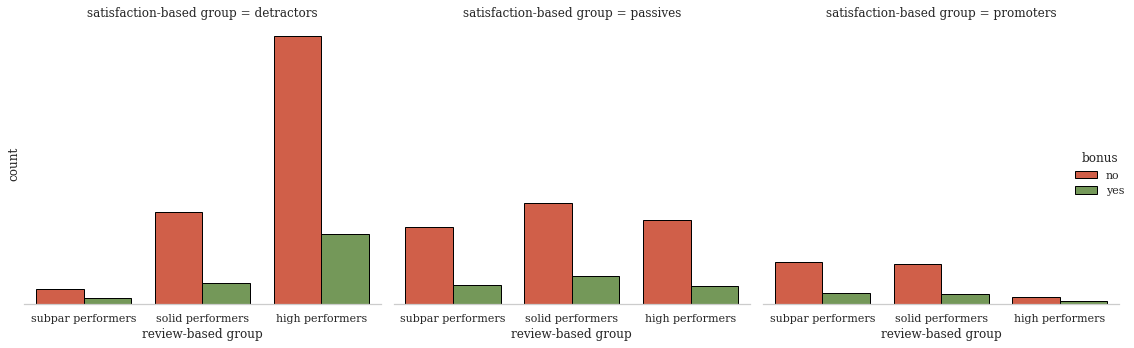

In [ ]:
df_promo_bonus = df[df['left'] == 'yes']
df_promo_bonus.rename(columns={'review.group3':'review-based group', 'satisfaction.group3':'satisfaction-based group'}, inplace=True)

df_promo_bonus['promoted'] = df_promo_bonus['promoted'].replace({0:'no', 1:'yes'})
df_promo_bonus['bonus'] = df_promo_bonus['bonus'].replace({0:'no', 1:'yes'})

# sns.set(fontsize=11)
sns.set_theme(style="whitegrid", font_scale=1, font='serif')
g=sns.catplot(x="review-based group", hue = "bonus", kind = 'count', col = "satisfaction-based group", order=['subpar performers', 'solid performers', 'high performers'],
    hue_order=None, col_order=['detractors', 'passives', 'promoters'],  data = df_promo_bonus, palette=['#e65032', '#73a24e'], ec='black') 
g.despine(left = True)

g.set(yticks=[])

plt.tight_layout()
plt.savefig('img/bonus and scores.png', bbox_inches='tight')
plt.show()

Detractors who were high performers were not given bonuses in the previous 24 months. This trend is also observed for passives and promoters

##### <font color='darkgreen'>_Promotion_</font> 

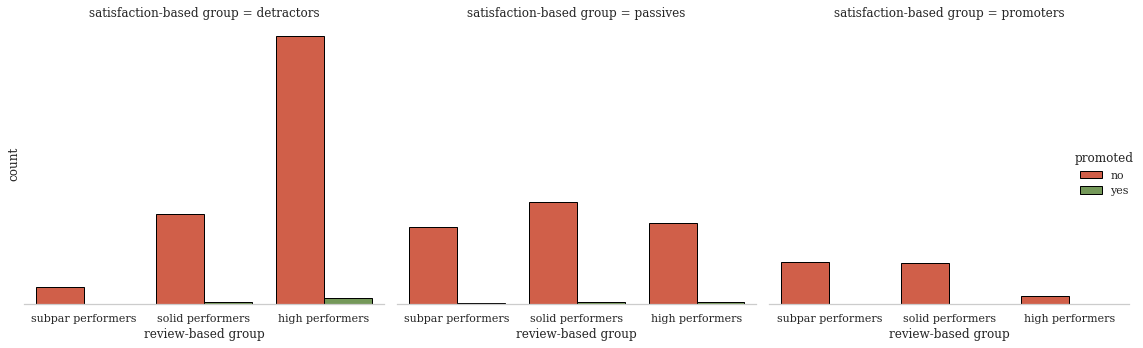

In [ ]:
sns.set_theme(style="whitegrid", font_scale=1, font='serif')
g=sns.catplot(x="review-based group", hue = "promoted", kind = 'count', col = "satisfaction-based group", order=['subpar performers', 'solid performers', 'high performers'],
    hue_order=None, col_order=['detractors', 'passives', 'promoters'], sharey = True, data = df_promo_bonus, palette=['#e65032', '#73a24e'], ec='black') 
g.despine(left = True)

g.set(yticks=[])

plt.tight_layout()
plt.savefig('img/promotion and scores.png', bbox_inches='tight')
plt.show()

Across the three employee segments - detractors, passives and promoters, only a handful of the solid and high performers were promoted in the previous 24 months. 

## Summary of Key Insights and Recommendations

The profile of employees at high risk of attrition include employees that:
- are involved in low number of projects (3 or less)
- work shorter hours (less than 184 hours monthly on average)
- work in the company for about 5 to 8 years
- are mostly high performers (review score of 0.7 or more)
- gave satisfaction scores of less than 0.7
- are in the sales, retail, engineering or operations department
- received medium salary
- had no bonus in the previous 24 months
- had not been promoted in the previous 24 months

The recommendations are to:
- provide high performers and passives bonuses and promotions in shorter time periods than 24 months
- increase the salary of such employees 
- ensure the employees are more engaged by giving them more projects to work on 
- have incentives and packages to celebrate long service (between 5 to 8 years) to improve employee retainership

## Resources and References

https://www.kaggle.com/joshuaswords/netflix-data-visualization

https://data-enhanced.com/2020/10/06/leveraging-the-narrative-arc-to-inspire-data-driven-action/

https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

https://matplotlib.org/devdocs/gallery/misc/packed_bubbles.html